# Ensemble Learning

Ensemble methods are known to impart supreme boost to tree based models.

Like every other model, a tree based algorithm also suffers from the plague of **bias** and **variance**.

Decision trees are prone to overfitting.

Normally, as you increase the complexity of your model, in this case decision tree, you will see a reduction in training error due to lower bias in the model. As you continue to make your model more complex, you end up over-fitting your model and your model will start suffering from high variance.

A champion model should maintain a balance between these two types of errors. This is known as the trade-off management of bias-variance errors. 

**Ensemble learning is one way to tackle bias-variance trade-off.**

There are various ways to ensemble *weak* learners to come up with *strong* learners:

1. Bagging - Random Forest Classifier
2. Boosting - XGBoost

### What is Bias

While training, the model learns the patterns in the dataset and applies them to test data for prediction. **While making predictions, a difference occurs between prediction values made by the model and actual values/expected values, and this difference is known as bias errors or Errors due to bias**. It can be defined as an inability of machine learning algorithms such as Linear Regression to capture the true relationship between the data points.

- **Low Bias**: A low bias model will make fewer assumptions about the form of the target function.
- **High Bias**: A model with a high bias makes more assumptions, and the model becomes unable to capture the important features of our dataset. **A high bias model also cannot perform well on new data.**

### What is Variance

The variance would specify the amount of variation in the prediction if the different training data was used. In simple words, **variance tells that how much a random variable is different from its expected value**. Ideally, a model should not vary too much from one training dataset to another, which means the algorithm should be good in understanding the hidden mapping between inputs and output variables. Variance errors are either of low variance or high variance.

- **Low variance** means there is a small variation in the prediction of the target function with changes in the training data set. 
- At the same time, **High variance** shows a large variation in the prediction of the target function with changes in the training dataset.

A model that shows high variance learns a lot and perform well with the training dataset, and does not generalize well with the unseen dataset. As a result, such a model gives good results with the training dataset but shows high error rates on the test dataset.

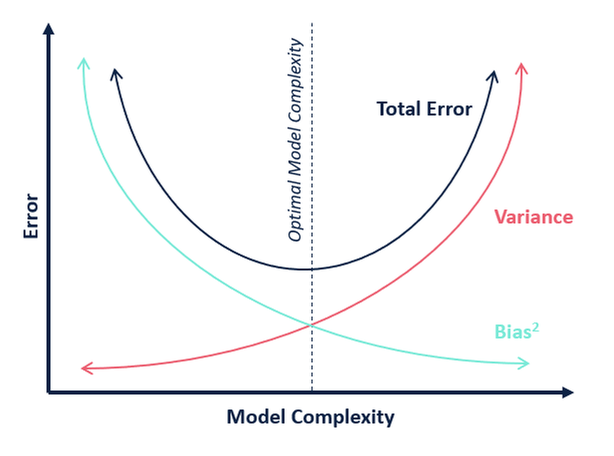

In supervised learning, **Underfitting** happens when a model unable to capture the underlying pattern of the data. These models usually have `high bias and high variance`. It happens when we have very less amount of data to build an accurate model or when we try to build a linear model with a nonlinear data.

In supervised learning, **Overfitting** happens when our model captures the noise along with the underlying pattern in data. It happens when we train our model a lot over noisy dataset. These models have `low bias and high variance`. These models are very complex like Decision trees which are prone to overfitting.

**Bias vs Variance -** 

1. Low Bias and High Variance - Training Error = 1% & Test Error = 20% (Overfitting)

2. High Bias and High Variance - Train Error = 25% & Test Error = 23% (Underfitting)

3. Low Bias and Low Variance - Train Error < 10% & Test Error < 10% (Right Model)

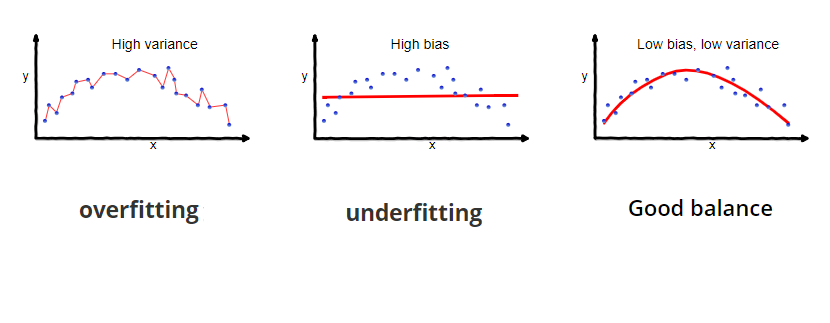

# 1. Bagging

Bagging is an ensemble technique used to reduce the variance of our predictions by combining the result of multiple classifiers modeled on different sub-samples of the same data set. The following figure will make it clearer:

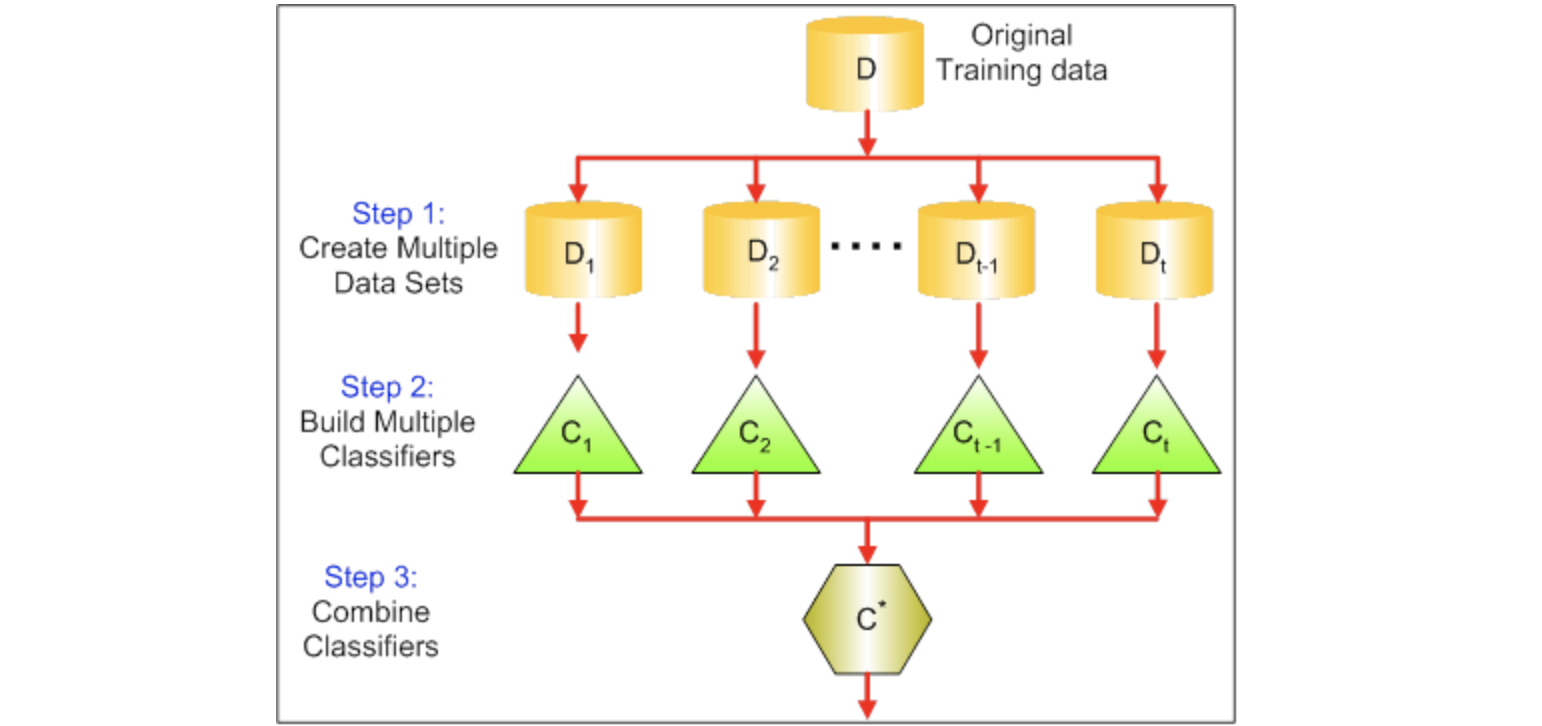

The steps followed in bagging are:

1. **Create Multiple DataSets:** Sampling is done with replacement on the original data and new datasets are formed.

2. **Build Multiple Classifiers:** Classifiers are built on each data set. Generally the same classifier is modeled on each data set and predictions are made.

3. **Combine Classifiers:** The predictions of all the classifiers are combined using a mean, median or mode value depending on the problem at hand.
The combined values are generally more robust than a single model.

There are various implementations of bagging models. Random forest is one of them and we’ll discuss it next.

## **Random Forest**

*   In Random Forest, we grow multiple trees as opposed to a single tree.
*   We construct trees from the subsets of the original dataset. These subsets can have a fraction of the columns as well as rows.
*   To classify a new object based on attributes, each tree gives a classification and we say that the tree “votes” for that class.
*   The forest chooses the classification having the most votes (over all the trees in the forest) 

#### **How does it work?**

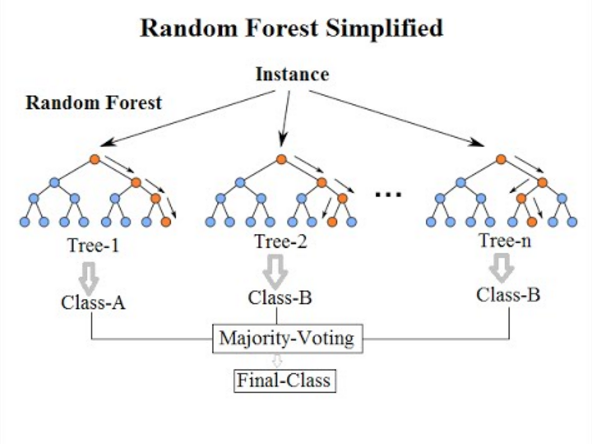

It works in the following manner:

*   Assume number of rows in the training set is N. Then, a sample of n < N rows is taken at random but *with replacement.* This sample will be the training set for growing the tree.
*   If there are M input variables, a number m < M is specified such that at each node, m variables are selected at random out of the M. The best split on these m is used to split the node. The value of m is held constant while we grow the forest.
*   Each tree is grown to the largest extent possible and  there is no pruning.
*   Predict new data by aggregating the predictions of the n tree trees (i.e., majority votes for classification, average for regression).

#### **Advantages**

*   This algorithm can solve both type of problems i.e. classification and regression and does a decent estimation at both fronts.
*   RF has the power of handling large datasets with higher dimensionality. It can handle thousands of input variables and identify most significant variables so it is considered as one of the dimensionality reduction methods. Further, the model outputs Importance of variable, which can be a very handy feature (on some random data set).
*   It has an effective method for estimating missing data and maintains accuracy when a large proportion of the data is missing.
*   It has methods for balancing errors in data sets where classes are imbalanced.

#### **Disadvantages**

*   It surely does a good job at classification but not as good as for regression problem as it does not give precise continuous nature predictions. In case of regression, it doesn’t predict beyond the range in the training data, and that they may over-fit data sets that are particularly noisy.
*   Random Forest can feel like a black box approach for statistical modelers – you have very little control on what the model does. You can at best – try different parameters and random seeds!

# Bagging vs. Boosting

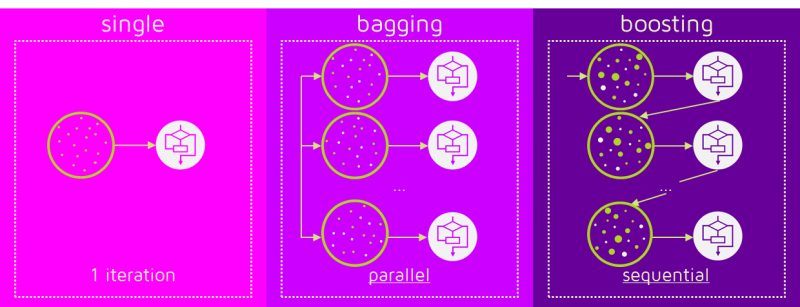

# Implementation

### The dataset has credit card transactions where our objective is to identify the fraudulent transactions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

In [2]:
# Reading the dataset
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,-0.390521,...,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0
1,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,-0.616315,...,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00,0
2,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,1.560463,...,-0.193271,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70,0
3,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,-0.001965,...,0.157994,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99,0
4,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,-1.131238,...,0.224157,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00,0


In [4]:
# Checking the shape of our data
data.shape

(56962, 30)

In [5]:
# Checking the distribution of two classes in the target variable
data.Target.value_counts()

0    56864
1       98
Name: Target, dtype: int64

Clearly the dataset is heavily imbalanced!

In [6]:
# Creating the dataset with all independent variables
X = data.iloc[:,:-1]

# Creating the dataset with the dependent variable
Y = data.iloc[:, -1]

* Split the dataset into train and test using stratified sampling on our dependent variable. 
* Using a stratified sampling ensures the distribution of dependent variable remains same across train and test datasets

In [7]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)

The stratify parameter asks whether you want to retain the same proportion of classes in the train and test sets that are found in the entire original dataset. It means if there are 60% 'yes' class data and 40% 'no' class data in the full dataset, then in train and test data split this proportion should be maintained.

In [8]:
print("The shape of train dataset :")
print(X_train.shape)

print("\n The shape of test dataset :")
print(X_test.shape)

The shape of train dataset :
(45569, 29)

 The shape of test dataset :
(11393, 29)


In [9]:
print("Distribution of classes of dependent variable in train :")
print(Y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(Y_test.value_counts())

Distribution of classes of dependent variable in train :
0    45491
1       78
Name: Target, dtype: int64

 Distribution of classes of dependent variable in test :
0    11373
1       20
Name: Target, dtype: int64


In [10]:
classifier = RandomForestClassifier()

In [11]:
classifier.fit(X_train,Y_train)

RandomForestClassifier()

Predicting on both train and test dataset using the fitted model

In [13]:
y_pred = classifier.predict(X_test)

In [ ]:
# Obtain accuracy on test set
accuracy_score(Y_test,y_pred)

**Accuracy is not a good metric to evaluate our model since the dataset is heavily imbalanced. Thus we will use roc_auc score and confusion matrix**

In [ ]:
# Calculate roc_auc score on test set
roc_auc_score(Y_test,y_pred)

In [15]:
# Obtain the confusion matrix on test set
confusion_matrix(Y_test,y_pred)

array([[11371,     2],
       [    5,    15]], dtype=int64)

In [16]:
from sklearn.metrics import precision_score, recall_score

precision_score(Y_test, y_pred)

0.8823529411764706

In [17]:
recall_score(Y_test, y_pred)

0.75

In [ ]:
0 - No fraud  (Negative)
1 - fraud happened  (Positive)

- **Precision**: Appropriate when minimizing false positives is the focus.
- **Recall**: Appropriate when minimizing false negatives is the focus.

In [ ]:
normal data - Accuracy score, rocaucscore, confusion matrix(precision score, recall score)
imbalanced data - rocaucscore, confusion matrix(precision score, recall score)

**Plot the variable importance**

In [18]:
features = X_train.columns
importances = classifier.feature_importances_
indices = np.argsort(importances)

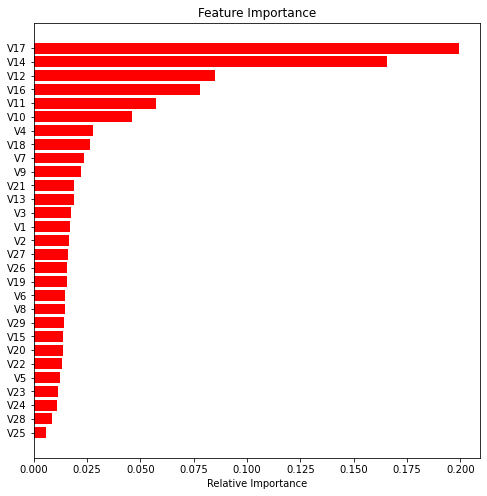

In [19]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()